Загружаем Библиотеки

In [1]:
#Необходимые библиотеки 
import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup
import requests as req


import re 
import nltk
import matplotlib.pyplot as plt
import pymorphy2

from nltk.tokenize import word_tokenize
from nltk.tokenize.casual import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree

#### Получение данных

In [18]:
HTMLFile = open("result.html", "rb")
index = HTMLFile.read()
S = BeautifulSoup(index)
item = S.find_all('div', class_='text')
set_text = []
for name in item:
    set_text.append(name.text)
set_text = [line.strip() for line in set_text]

#######################################################

# HTMLFile = open("result_2.html", "rb")
# index = HTMLFile.read()
# S = BeautifulSoup(index, 'lxml')
# item = S.find_all('div', class_='text')
# set_text2 = []
# for name in item:
#     set_text2.append(name.text)
# set_text2 = [line.strip() for line in set_text2]

#########################################################



##########################################################


###########################################################

#x=[]
#for i in range(2,3):
    #HTMLFile = open(f"Детпранс Москвы{i}.html", "rb")
    #index = HTMLFile.read()
    #S = BeautifulSoup(index, 'lxml')
    #item = S.find_all('div', class_='text')
    #set_text5 = []
    #for name in item:
        #set_text5.append(name.text)
        #x.append(name.text.strip())
    #set_text5 = [line.strip() for line in set_text5]
    

SyntaxError: invalid syntax (1249573374.py, line 4)

In [17]:
set_text

[]

In [4]:
set_text2

[]

In [5]:
len(set_text)

0

Создаем датасеты 

In [6]:
data=pd.DataFrame({'text':set_text,'group':['Яхты' for i in range(len(set_text))]})
data


,text,group


In [7]:
df=pd.DataFrame({'text':set_text2,'group':['Яхты' for i in range(len(set_text2))]})
df

,text,group


In [8]:
car=pd.DataFrame({'text':set_text3,'group':['Машины' for i in range(len(set_text3))]})
car

NameError: name 'set_text3' is not defined

In [ ]:
car2=pd.DataFrame({'text':set_text4,'group':['Машины' for i in range(len(set_text4))]})
car2

,text,group
0,Авто | Машины | Тачки,Машины
1,Гримасы продаж китайских машин в России: как м...,Машины
2,Lexus представил совершенно новый кроссовер RZ...,Машины
3,Машину за зерно: новые авто в РФ будут поставл...,Машины
4,XCELL — мотоцикл из экологически чистого будущ...,Машины
...,...,...
150,Tesla сэкономила на производстве в ущерб безоп...,Машины
151,"Hyundai показала концепткар, вдохновлённый «Ди...",Машины
152,Дизайн электрокара Volkswagen ID.7 раскрыт до ...,Машины
153,КамАЗ выпустит на рынок две новые модели.Запус...,Машины


In [ ]:
det=pd.DataFrame({'text':x,'group':['Детпранс' for i in range(len(x))]})
det

,text,group
0,Дептранс Москвы,Детпранс
1,❗️На Мосфильмовской улице произошла серьезная ...,Детпранс
2,Сотрудник ГИБДД предварительно жив и госпитали...,Детпранс
3,Как изменится столица после полного запуска БК...,Детпранс
4,Прокатились по всей Москве на самом летнем тра...,Детпранс
...,...,...
712,​Московскому каршерингу исполнилось 5 лет! В 2...,Детпранс
713,​🎵🚲Осенний Велофестиваль в этом году пройдет в...,Детпранс
714,"🎉Ровно 2 года назад, в сентябре 2018 года мы с...",Детпранс
715,🚦Сейчас на дорогах 6 баллов. С 5 часов и до 8 ...,Детпранс


Объединяем датасеты

In [ ]:
frame= [data, df]
res1=pd.concat(frame)
res1

,text,group
0,Про яхты,Яхты
1,Всем привет! Вот завел себе телеграмм канал,Яхты
2,Записал курс из 12 лекций по управлению яхтой....,Яхты
3,"Согласуясь с ""хорошей морской практикой"", нач...",Яхты
4,Анонсированы гоночные дистанции 36 кубка Амери...,Яхты
...,...,...
128,По волнам памяти Кубка Америки. Командор и кон...,Яхты
129,2125 миль остается 53-летней Кирстен Нойшаффер...,Яхты
130,⛵️ Турция на яхте⛵️Отдых наших туристов в Анта...,Яхты
131,Корабль Его Величества Trincomalee. Прекрасное...,Яхты


In [ ]:
frame= [car, car2]
res2=pd.concat(frame)
res2

,text,group
0,Авто | Машины | Тачки,Машины
1,Обычный Питерский двор,Машины
2,Купили авто у перекупа 😶,Машины
3,Заметили как ужасно стал работать ВКонтакте на...,Машины
4,"B Mocквe вopы зa 2 чaca paзoбpaли нoвый ""ВМW-X...",Машины
...,...,...
150,Tesla сэкономила на производстве в ущерб безоп...,Машины
151,"Hyundai показала концепткар, вдохновлённый «Ди...",Машины
152,Дизайн электрокара Volkswagen ID.7 раскрыт до ...,Машины
153,КамАЗ выпустит на рынок две новые модели.Запус...,Машины


In [ ]:
frame= [res1,res2,det]
res3=pd.concat(frame)
res3

,text,group
0,Про яхты,Яхты
1,Всем привет! Вот завел себе телеграмм канал,Яхты
2,Записал курс из 12 лекций по управлению яхтой....,Яхты
3,"Согласуясь с ""хорошей морской практикой"", нач...",Яхты
4,Анонсированы гоночные дистанции 36 кубка Амери...,Яхты
...,...,...
712,​Московскому каршерингу исполнилось 5 лет! В 2...,Детпранс
713,​🎵🚲Осенний Велофестиваль в этом году пройдет в...,Детпранс
714,"🎉Ровно 2 года назад, в сентябре 2018 года мы с...",Детпранс
715,🚦Сейчас на дорогах 6 баллов. С 5 часов и до 8 ...,Детпранс


In [ ]:
x

['Дептранс Москвы',
 '❗️На Мосфильмовской улице произошла серьезная авария. Водитель такси не пропустил сотрудника ГИБДД на мотоцикле. У водителя мотоцикла повреждения тяжелой степени тяжести, на месте находится Дорожный патруль. Ожидаем более подробную информацию о случившемся и выясняем обстоятельства.',
 'Сотрудник ГИБДД предварительно жив и госпитализирован в 1-ую Градскую больницу им. Н.И. Пирогова, с предварительным диагнозом: сотрясение головного мозга, закрытая черепно-мозговая травма, ушиб грудной клетки, перелом плеча.',
 'Как изменится столица после полного запуска БКЛ? Основные факты⬆️',
 'Прокатились по всей Москве на самом летнем транспорте — велосипеде.Наслаждайтесь🔥',
 '💺Пока пассажиропоток на метро, наземном транспорте, ж/д и каршеринге снизился, люди стали чаще ездить на личных авто и такси. ⬆️Посмотрели, как изменились поездки жителей Москвы на разных видах транспорта — сравнили цифры до периода самоизоляции и показатели вчерашнего дня.',
 '📎Экспертное мнение: Москва

#### EDA и инженерия данных

In [ ]:
data_new = res3.dropna()#Удаляем дубликаты 

In [ ]:
data_new.isnull().sum()#Кол-во переменных с пропуском

text     0
group    0
dtype: int64

In [ ]:
len(data_new)#Длинна датасета, Дубликотов не обнаружило.

2454

In [ ]:
dt= data_new.drop_duplicates()

#### Токенизация

In [ ]:
dt = data_new.astype({'text': np.str})

C:\Users\Fenomen21\AppData\Local\Temp\ipykernel_10404\955524038.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dt = data_new.astype({'text': np.str})


In [ ]:
stop_words = stopwords.words('russian')
morph = pymorphy2.MorphAnalyzer()
lemmatizer = WordNetLemmatizer()
tknzr = TweetTokenizer()
tokenize_doc = []

for doc in dt['text']:
    doc = tknzr.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in stop_words]
    doc = [lemmatizer.lemmatize(word) for word in doc]
    doc = [word for word in doc if word not in ':;.,!?\'\"/)( ']
    doc = [morph.normal_forms(word)[0] for word in doc]
    tokenize_doc.append(doc)

In [ ]:
tokenize_doc

[['яхта'],
 ['весь', 'привет', 'завести', 'телеграмма', 'канал'],
 ['записать',
  'курс',
  '12',
  'лекция',
  'управление',
  'яхта',
  'монтировать',
  'скоро',
  'родиться',
  'нетленка'],
 ['согласоваться',
  'хороший',
  'морской',
  'практика',
  'начинать',
  'морской',
  'путешествие',
  'пятница',
  'дело',
  'хороший',
  'поэтому',
  'весь',
  'хороший',
  'выходной',
  'завтра',
  '...',
  'выходить',
  'воскресение',
  '❤'],
 ['анонсировать',
  'гоночный',
  'дистанция',
  '36',
  'кубок',
  'америка',
  'оклендея',
  'кубок',
  'америка',
  'рядом',
  'зритель'],
 ['https://www.youtube.com/watch?v=eimqxzymbqe'],
 ['дополнение',
  'презентация',
  'новый',
  'яхта',
  'кук',
  'америка',
  'который',
  'пройти',
  'каус',
  'вчера'],
 ['https://www.facebook.com/yachtingworldmagazine/videos/313585902708657/uzpfstexmdk4oduxmdkxmzaxndk6mtgymji5mji1ndu1nja5na/?hc_ref=arr24sdlsucox4pjyqucliivoa6dpt3azqq6zcr4iycwanxsgnvdk4dq3lgcpf-rz3k&fref=nf&__xts__',
  '[',
  '0',
  ']=',
  '

In [ ]:
token_t = [' '.join(i) for i in tokenize_doc]
token_t

['яхта',
 'весь привет завести телеграмма канал',
 'записать курс 12 лекция управление яхта монтировать скоро родиться нетленка',
 'согласоваться хороший морской практика начинать морской путешествие пятница дело хороший поэтому весь хороший выходной завтра ... выходить воскресение ❤',
 'анонсировать гоночный дистанция 36 кубок америка оклендея кубок америка рядом зритель',
 'https://www.youtube.com/watch?v=eimqxzymbqe',
 'дополнение презентация новый яхта кук америка который пройти каус вчера',
 'https://www.facebook.com/yachtingworldmagazine/videos/313585902708657/uzpfstexmdk4oduxmdkxmzaxndk6mtgymji5mji1ndu1nja5na/?hc_ref=arr24sdlsucox4pjyqucliivoa6dpt3azqq6zcr4iycwanxsgnvdk4dq3lgcpf-rz3k&fref=nf&__xts__ [ 0 ]= 68 arcqi 3uy00ujbgzm3shdvuontl6qvwozoljy - 9xobwpzyatab7uhdwpwo5zokhhddovkayhsevcz4w033l_p4ghqrgmhest51ozautisdxdtxchkjb9pnsbvuiqbyez3txpkgoufb - eyneq-lhkzakpx 5lrgba50ydnhszzenuqguix7e6rypty & __tn__ = kch-r',
 'первый женский кругосветка одиночка ...',
 'https://www.instagr

In [ ]:
#Векторизация слов 
vectorizer = TfidfVectorizer(min_df = 10)
vectors = vectorizer.fit_transform(token_t)
fichi = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
fichi

,00,000,02,06,10,100,1000,11,110,11th,...,японец,японский,яркий,яхт,яхта,яхтеннаяшкола,яхтенныекурс,яхтенный,яхтинг,яхтсмен
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.246017,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,0.0,0.0,0.0,0.0,0.061598,0.0,0.0,0.0,0.100214,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2450,0.0,0.0,0.0,0.0,0.047804,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2451,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2452,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Добавляю столбец группы
fichi['group']=dt['group'].to_list()

In [ ]:
#Разделим набор данных на признаки и метки
X = fichi.drop(columns=['group'])#Целевая метка 
y = fichi[['group']]#Признаки

In [ ]:
fichi['group'].value_counts()

Машины      1134
Детпранс     717
Яхты         603
Name: group, dtype: int64

In [ ]:
fichi

,00,000,02,06,10,100,1000,11,110,11th,...,японский,яркий,яхт,яхта,яхтеннаяшкола,яхтенныекурс,яхтенный,яхтинг,яхтсмен,group
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,Яхты
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Яхты
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.246017,0.0,0.0,0.0,0.0,0.0,Яхты
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Яхты
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Яхты
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,0.0,0.0,0.0,0.0,0.061598,0.0,0.0,0.0,0.100214,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Детпранс
2450,0.0,0.0,0.0,0.0,0.047804,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Детпранс
2451,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Детпранс
2452,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Детпранс


In [ ]:
#тестовые и тренировочные выборки
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)

#### Обучение по модели

In [9]:

from catboost import CatBoostClassifier, Pool

clf = CatBoostClassifier(
    iterations=10, #Количество итерраций 
    learning_rate=0.1, #Градиентный спуск
    loss_function='MultiClass'#Функция потерь 
)

ModuleNotFoundError: No module named 'catboost'

In [ ]:
clf.fit(X_train, y_train,         
        eval_set=(X_test, y_test), 
        verbose=False
)

#### Проверка точности модели, метрикой f1-score
На обученных данных 


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, clf.predict(X_test),average='micro')

0.7991858887381276

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train, clf.predict(X_train),average='micro')

0.81537565521258

#### Построение матрицы confusion

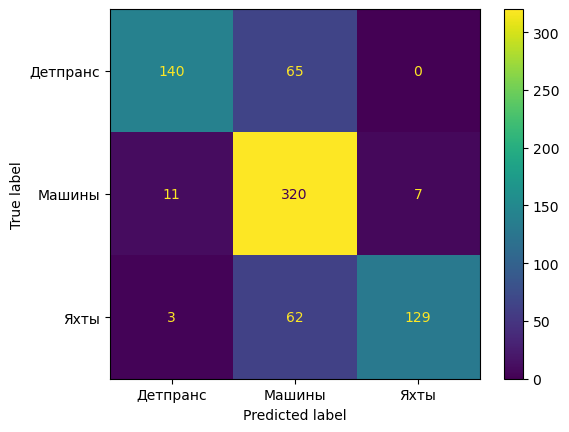

In [ ]:
#На тестовых данных
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmm,
                              display_labels=clf.classes_)

disp.plot()
plt.show()

### Для исходных данных 

In [ ]:
tknzr = TweetTokenizer()
original_document = []

for document in dt['text']:
    document = tknzr.tokenize(document)
    document = [word.lower() for word in document]
    original_document.append(document)

In [ ]:
original_text = [' '.join(i) for i in original_document]
original_text

['про яхты',
 'всем привет ! вот завел себе телеграмм канал',
 'записал курс из 12 лекций по управлению яхтой . сейчас монтируем и скоро уже родиться . нетленка .',
 'согласуясь с " хорошей морской практикой " , начинать морское путешествие в пятницу дело не хорошее . поэтому всем хороших выходных , а уже завтра можно ... я выхожу в воскресенье ) ) ) ❤',
 'анонсированы гоночные дистанции 36 кубка америки в оклендею никогда еще кубок америки не был так рядом со зрителями .',
 'https://www.youtube.com/watch?v=eimqxzymbqe',
 'ну и в дополнение презентация новых яхт кука америки которая прошла в каусе вчера',
 'https://www.facebook.com/yachtingworldmagazine/videos/313585902708657/uzpfstexmdk4oduxmdkxmzaxndk6mtgymji5mji1ndu1nja5na/?hc_ref=arr24sdlsucox4pjyqucliivoa6dpt3azqq6zcr4iycwanxsgnvdk4dq3lgcpf-rz3k&fref=nf&__xts__ [ 0 ]= 68 . arcqi 3uy00ujbgzm3shdvuontl6qvwozoljy - 9xobwpzyatab7uhdwpwo5zokhhddovkayhsevcz4w033l_p4ghqrgmhest51ozautisdxdtxchkjb9pnsbvuiqbyez3txpkgoufb - eyneq-lhkzakpx 5l

In [ ]:
#добавление в датафрейм обработанного текста 
dt['original_text'] = original_text


In [ ]:
vectorizer = TfidfVectorizer(min_df = 10)
vectors = vectorizer.fit_transform(original_text)
fichi = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
fichi

,00,000,02,06,10,100,1000,11,110,11th,...,яхтенныекурсы,яхтенный,яхтенных,яхтинг,яхтинга,яхтой,яхтсмен,яхтсменов,яхту,яхты
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.698841
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.438594,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,0.0,0.0,0.0,0.0,0.076053,0.0,0.0,0.0,0.123731,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2450,0.0,0.0,0.0,0.0,0.054608,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2451,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2452,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [ ]:
#fichi['group'] = dt['group'].to_list()
y = dt['group']

In [ ]:
#fichi= fichi.drop(columns=['group'])

In [ ]:
#Произвел замену классов, тк не мог перевести в данные Float
y= y.replace(to_replace=["Яхты", "Детпранс", "Машины", ],
           value=[0,1,2])


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
712    1
713    1
714    1
715    1
716    1
Name: group, Length: 2454, dtype: int64

In [ ]:
y.value_counts()

2    1134
1     717
0     603
Name: group, dtype: int64

In [ ]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
fichi, y, test_size=0.3, random_state=42)

In [ ]:
from catboost import CatBoostClassifier, Pool

clf = CatBoostClassifier(
    iterations=10, #Количество итерраций 
    learning_rate=0.1, #Градиентный спуск
    loss_function='MultiClass'#Функция потерь 
)

In [ ]:
clf.fit(X_train_orig, y_train_orig,         
        eval_set=(X_test_orig, y_test_orig),
        verbose=False
)

# На исходных данных

In [ ]:

from sklearn.metrics import f1_score

f1_score(y_test_orig, clf.predict(X_test_orig),average='micro')

0.7544097693351425

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_orig, clf.predict(X_train_orig),average='micro')

0.7734420500873616

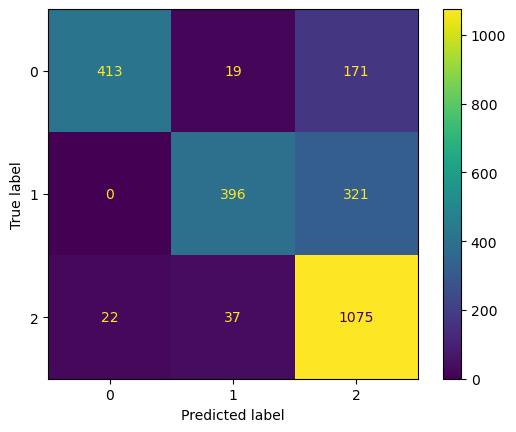

In [ ]:
#На исходных данных
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, clf.predict(fichi), labels=clf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp_rf.plot()